## Import Library

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

## Load Dataset MNIST

In [27]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [28]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


## Visualiasi Contoh Citra

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

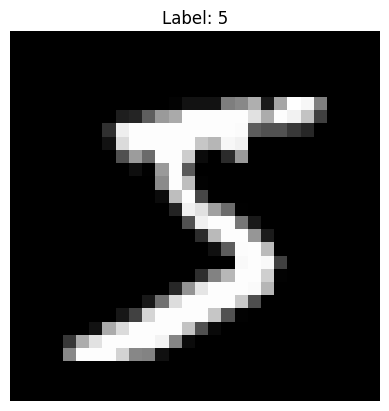

In [4]:
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')

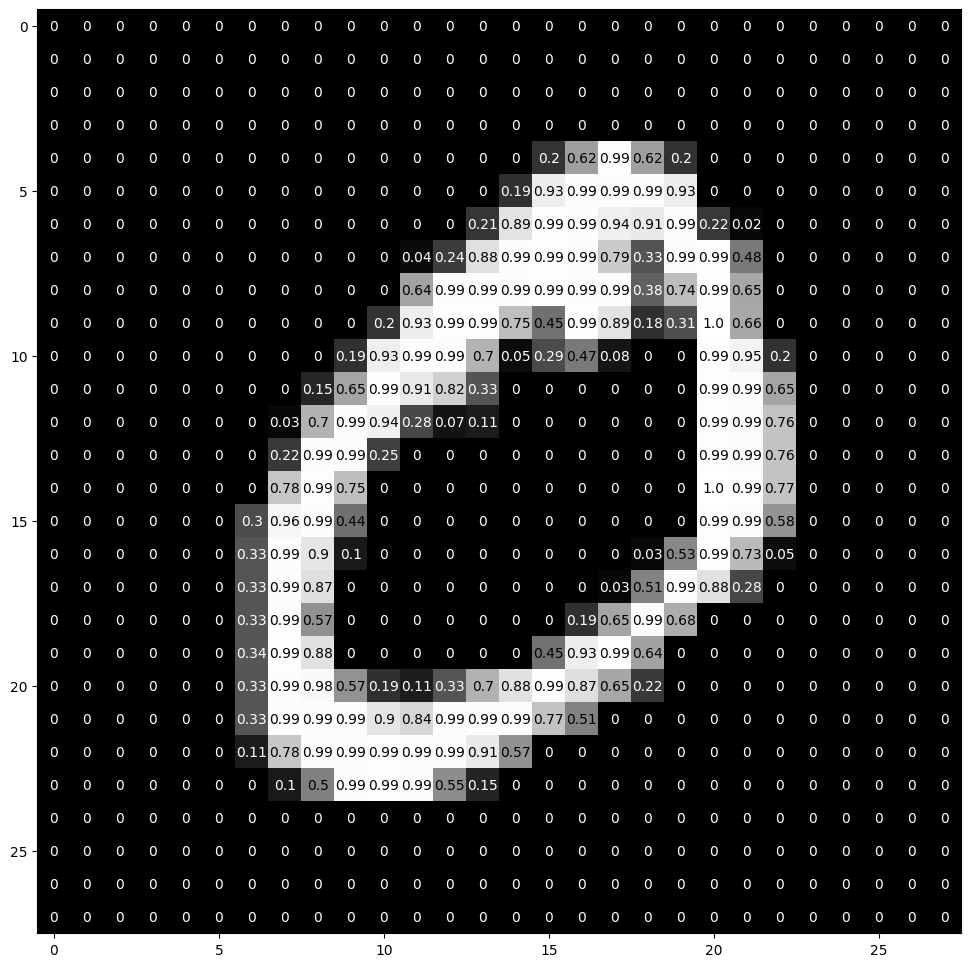

In [21]:
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0

        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

## Preprocessing Data

Normalisasi Pixel

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Flatten Gambar

In [6]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

One-Hot Encoding label

In [7]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Bangun Model MLP

In [8]:
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile Model

In [9]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Training Model

In [10]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7331 - loss: 0.8484 - val_accuracy: 0.9474 - val_loss: 0.1800
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9329 - loss: 0.2264 - val_accuracy: 0.9589 - val_loss: 0.1326
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9502 - loss: 0.1693 - val_accuracy: 0.9647 - val_loss: 0.1123
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9612 - loss: 0.1350 - val_accuracy: 0.9662 - val_loss: 0.1082
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9658 - loss: 0.1120 - val_accuracy: 0.9692 - val_loss: 0.0992
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9691 - loss: 0.1002 - val_accuracy: 0.9732 - val_loss: 0.0901
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9749 - loss: 0.0858 - val_accuracy: 0.9744 - val_loss: 0.0835
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9767 - loss: 0.0746 - val_accuracy: 

## Evaluasi Model

In [11]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9712 - loss: 0.0916
Test Accuracy: 0.975600004196167


## Grafik Akurasi

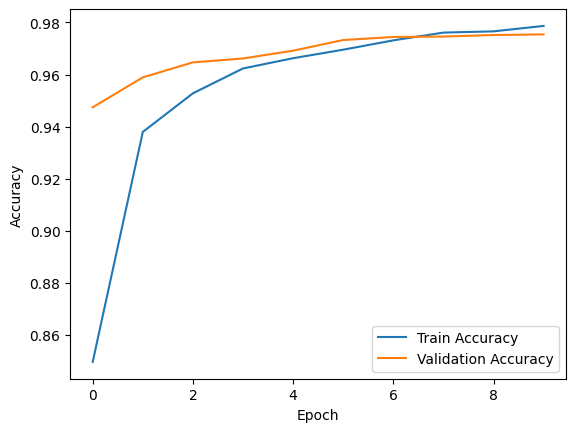

In [12]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()